In [1]:
%pylab inline
import scipy.io as sio
from sklearn.neighbors import NearestNeighbors
from sklearn import svm, grid_search, tree
from sklearn.cross_validation import cross_val_predict, cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from IPython.display import Image, IFrame
import csv
import pydot

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = "/Users/kjordan/Desktop/Machine_Learning/ML_Edu_pts/preshortlong_roland_CSTcombo.csv"
data = np.genfromtxt(filename, delimiter=",")
mytext=[]
with open(filename, 'rU') as csvfile:
    readit = csv.reader(csvfile, delimiter=",", dialect=csv.excel_tab)
    for row in readit:
        mytext.append(row)
classnames = ['no_deficit', 'deficit']
featurenames = mytext[0]
data = data[1:,:]
print featurenames
print data.shape

['pre_motor_def', 'pre_sense_def', 'pre_lang_def', 'pre_vision_def', 'pre_slf2', 'pre_slf3', 'pre_arc', 'pre_slftp', 'pre_ilf', 'pre_mdlf', 'pre_ifof', 'pre_unc', 'pre_cst', 'xtra', 'xtra', 'pre_or', 'short_motor_def', 'short_sense_def', 'short_lang_def', 'short_vision_def', 'short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc', 'short_cst', 'xtra', 'xtra', 'short_or', 'long_motor_def', 'long_sense_def', 'long_lang_def', 'long_vision_def', 'long_slf2', 'long_slf3', 'long_arc', 'long_slftp', 'long_ilf', 'long_mdlf', 'long_ifof', 'long_unc', 'long_cst', 'xtra', 'xtra', 'long_or']
(33, 48)


# Functions

In [3]:
def doforest(x,y,featurelabels, figname):
    from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
    from sklearn.cross_validation import cross_val_score
    import matplotlib.pyplot as plt
    clf = RandomForestClassifier(n_estimators=1000, )
    #clf2 = ExtraTreesClassifier(n_estimators=500)
    clf_fit = clf.fit(x,y)
    scores = cross_val_score(clf,x,y)
    meanscore = scores.mean()
    importances = clf_fit.feature_importances_
    print meanscore
    print importances
    print featurelabels
    std = np.std([tree.feature_importances_ for tree in clf_fit.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    for f in range(x.shape[1]):
        print("%d. feature %d = %s (%f)" % (f + 1, indices[f], featurelabels[indices[f]], importances[indices[f]]))
    #plt.figure()
    plt.title("Feature importances: "+figname)
    plt.bar(range(x.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
    plt.xticks(range(x.shape[1]), indices)
    plt.xlim([-1, x.shape[1]])
    #plt.show()
    savefig(figname+'.png')
    return importances, meanscore

In [4]:
def dotree(x,y,featurenames,name):
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf = tree_clf.fit(x,y)
    from sklearn.externals.six import StringIO
    with open(name+".dot",'w') as f:
        f=tree.export_graphviz(tree_clf, out_file=f)

    dot_data = StringIO()
    tree.export_graphviz(tree_clf, out_file=dot_data, feature_names=featurenames)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(name+".png")

### Reproduction of Previously Published Results: http://thejns.org/doi/abs/10.3171/2015.6.JNS142203

# Deficit Prediction Cohort Background: 

#### There are three timepoints represented here: 

Pre = Presurgery (<3 days before surgery)

Short = Postsurgery Short Term (< 3 days after surgery)

Long = Postsurgery Long Term (> 3 months after surgery)

#### There are several white matter tracts reconstructed using HARDI q-ball bootstrap tractography: 

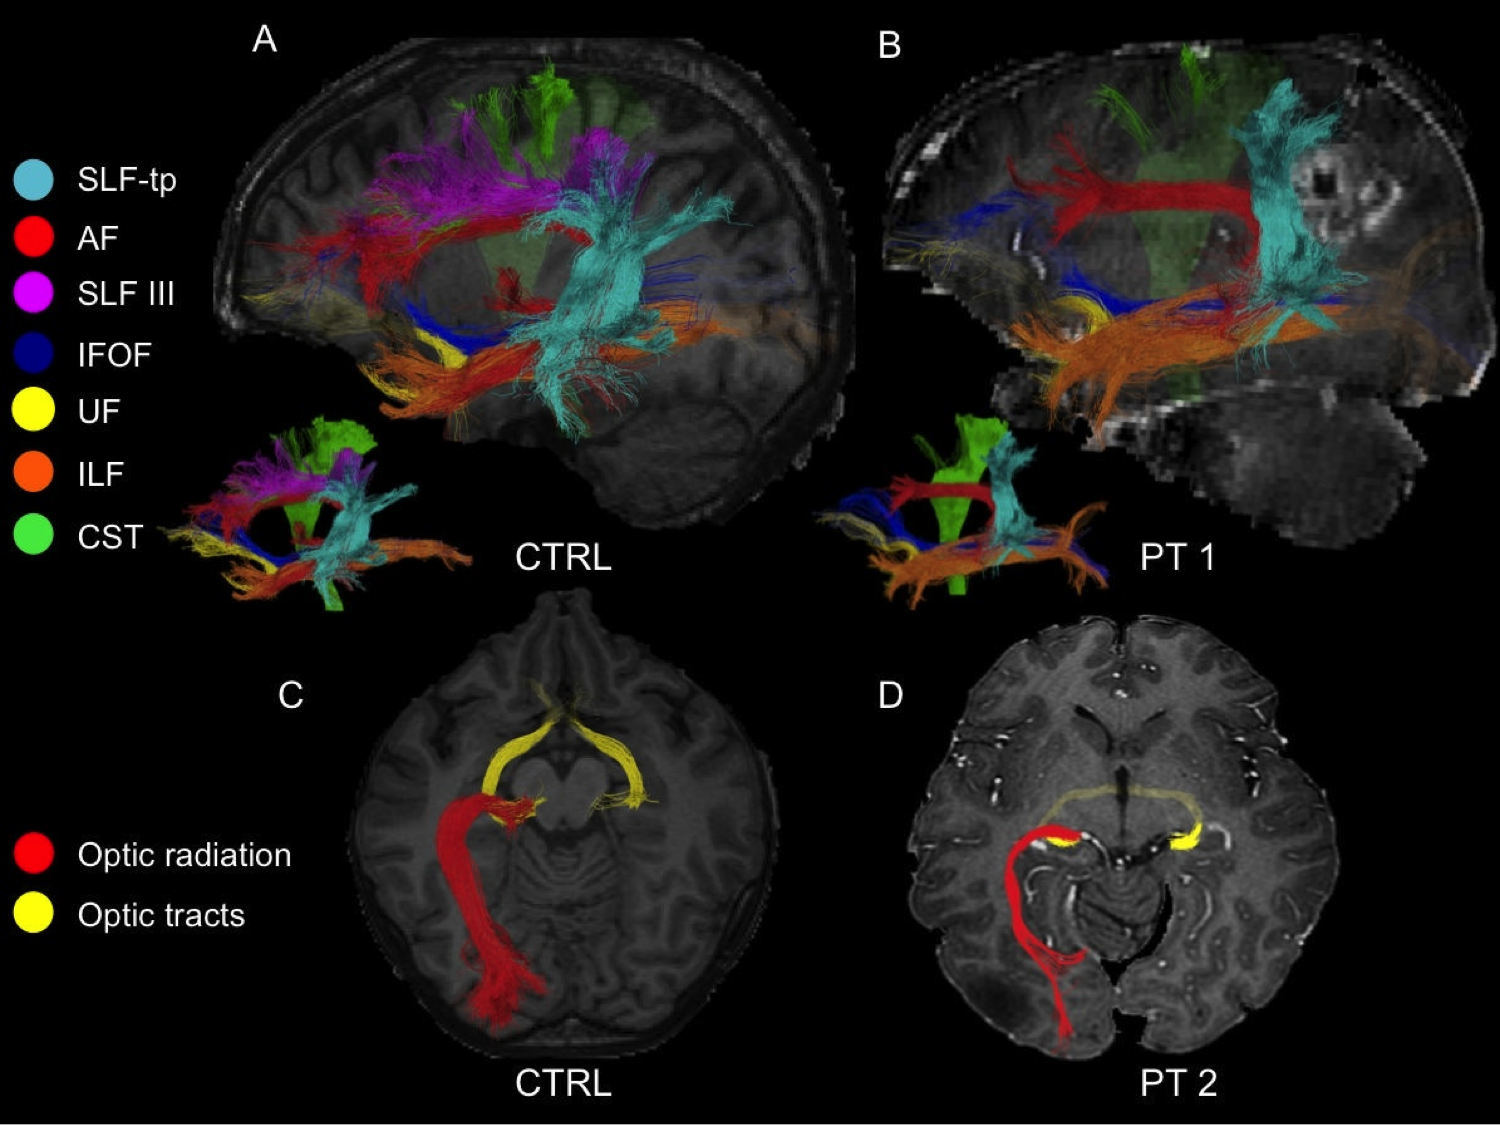

In [5]:
Image("trackatlas_from_edu.png")

# Data Setup

In [6]:
prex = data[:,4:16]
prefeat = featurenames[4:16]

prey = data[:,0:4]
preylabel = featurenames[0:4]

print prefeat
print preylabel

['pre_slf2', 'pre_slf3', 'pre_arc', 'pre_slftp', 'pre_ilf', 'pre_mdlf', 'pre_ifof', 'pre_unc', 'pre_cst', 'xtra', 'xtra', 'pre_or']
['pre_motor_def', 'pre_sense_def', 'pre_lang_def', 'pre_vision_def']


In [7]:
shortx = data[:,20:32]
shortfeat = featurenames[20:32]

shorty = data[:,16:20]
shortylabel = featurenames[16:20]

print shortfeat
print shortylabel

['short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc', 'short_cst', 'xtra', 'xtra', 'short_or']
['short_motor_def', 'short_sense_def', 'short_lang_def', 'short_vision_def']


In [8]:
longx = data[:,36:]
longfeat = featurenames[36:]

longy = data[:,32:36]
longylabel = featurenames[32:36]

print longfeat
print longylabel

['long_slf2', 'long_slf3', 'long_arc', 'long_slftp', 'long_ilf', 'long_mdlf', 'long_ifof', 'long_unc', 'long_cst', 'xtra', 'xtra', 'long_or']
['long_motor_def', 'long_sense_def', 'long_lang_def', 'long_vision_def']


# Analysis (NOTE: output suppressed if it isn't reasonable)

## Presurgery (< 3 days before surgery)

### Motor System (all tracks included in X)

#### CST = Corticospinal Track

In [9]:
name = "preMOTOR"
deficit = 0
print preylabel[deficit]
dotree(prex, prey[:,deficit],prefeat, name)
print "NUMBER OF DEFICITS:"
print sum(prey[:,deficit])
#Image(name+'.png',width=700,height=500)

pre_motor_def
NUMBER OF DEFICITS:
5.0


In [10]:
#importances, meanaccuracy = doforest(prex, prey[:,0], prefeat, "preMOTOR_forest")

### Sensory System (Not studied well... ignore)

In [11]:
name = "preSENSE"
deficit = 1
print preylabel[deficit]
dotree(prex, prey[:,deficit],prefeat, name)
print "NUMBER OF DEFICITS:"
print sum(prey[:,deficit])
#Image(name+'.png',width=200,height=150)

pre_sense_def
NUMBER OF DEFICITS:
0.0


### Language System (only language tracks included in X)

#### slftp=SLF temporal-parietal branch, arc = Arcuate, ifof=Inferior fronto-occipital

pre_lang_def
NUMBER OF DEFICITS:
3.0


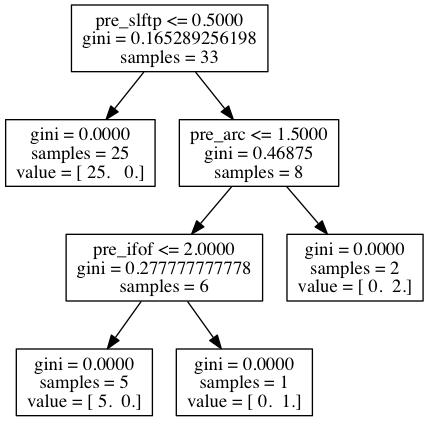

In [12]:
name = "preLANG"
deficit = 2
print preylabel[deficit]
dotree(prex, prey[:,deficit],prefeat, name)
print "NUMBER OF DEFICITS:"
print sum(prey[:,deficit])
Image(name+'.png',width=700,height=500)
Image(name+'.png')

0.909090909091
[ 0.07385353  0.07430318  0.12678352  0.25547646  0.03352784  0.15810879
  0.18645695  0.04748973]
['pre_slf2', 'pre_slf3', 'pre_arc', 'pre_slftp', 'pre_ilf', 'pre_mdlf', 'pre_ifof', 'pre_unc']
1. feature 3 = pre_slftp (0.255476)
2. feature 6 = pre_ifof (0.186457)
3. feature 5 = pre_mdlf (0.158109)
4. feature 2 = pre_arc (0.126784)
5. feature 1 = pre_slf3 (0.074303)
6. feature 0 = pre_slf2 (0.073854)
7. feature 7 = pre_unc (0.047490)
8. feature 4 = pre_ilf (0.033528)


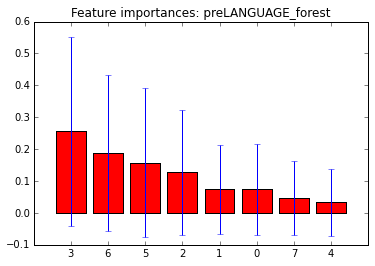

In [13]:
importances, meanaccuracy = doforest(prex[:,:-4], prey[:,2], prefeat[:-4], "preLANGUAGE_forest")

### Visual System (all tracks included in X)

#### or = optic radiation

In [14]:
name = "preOPTIC"
deficit = 3
print preylabel[deficit]
dotree(prex, prey[:,deficit],prefeat, name)
print "NUMBER OF DEFICITS:"
print sum(prey[:,deficit])
#Image(name+'.png',width=700,height=500)

pre_vision_def
NUMBER OF DEFICITS:
2.0


## Short Term Postsurgery (< 3 days after surgery)

### Motor System (all tracks included in X)

#### CST = Corticospinal Track

short_motor_def
NUMBER OF DEFICITS:
14.0


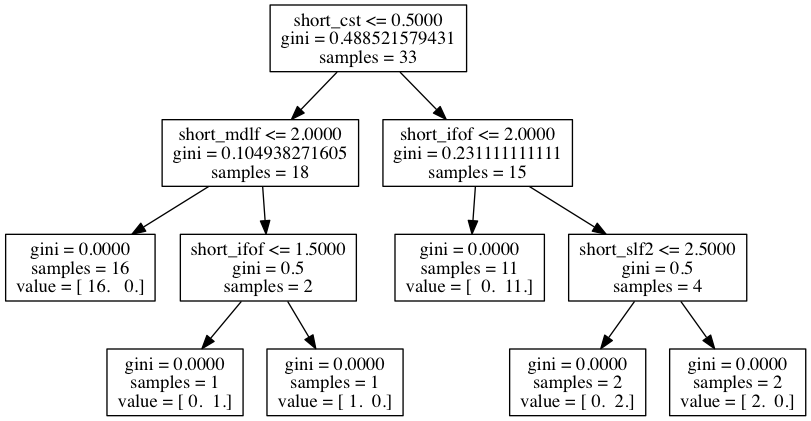

In [15]:
name = "shortMOTOR"
deficit = 0
print shortylabel[deficit]
dotree(shortx, shorty[:,deficit],shortfeat, name)
print "NUMBER OF DEFICITS:"
print sum(shorty[:,deficit])
Image(name+'.png',width=700,height=500)

0.875252525253
[ 0.10017989  0.07705524  0.08734394  0.05127945  0.02157518  0.05843981
  0.18942865  0.06161816  0.34192676  0.          0.          0.01115292]
['short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc', 'short_cst', 'xtra', 'xtra', 'short_or']
1. feature 8 = short_cst (0.341927)
2. feature 6 = short_ifof (0.189429)
3. feature 0 = short_slf2 (0.100180)
4. feature 2 = short_arc (0.087344)
5. feature 1 = short_slf3 (0.077055)
6. feature 7 = short_unc (0.061618)
7. feature 5 = short_mdlf (0.058440)
8. feature 3 = short_slftp (0.051279)
9. feature 4 = short_ilf (0.021575)
10. feature 11 = short_or (0.011153)
11. feature 10 = xtra (0.000000)
12. feature 9 = xtra (0.000000)


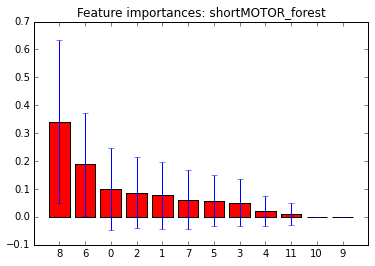

In [16]:
importances, meanaccuracy = doforest(shortx, shorty[:,0], shortfeat, "shortMOTOR_forest")

### Sensory System (Not studied well... ignore)

In [29]:
name = "shortSENSE"
deficit = 1
print shortylabel[deficit]
dotree(shortx, shorty[:,deficit],shortfeat, name)
print "NUMBER OF DEFICITS:"
print sum(shorty[:,deficit])
#Image(name+'.png',width=700,height=500)

short_sense_def
NUMBER OF DEFICITS:
1.0


### Language System (only language tracks included in X)

#### (slftp = SLF temporal-parietal branch, arc = Arcuate, ifof=Inferior fronto-occipital, ilf = Inferior longitudinal)

short_lang_def
NUMBER OF DEFICITS:
13.0


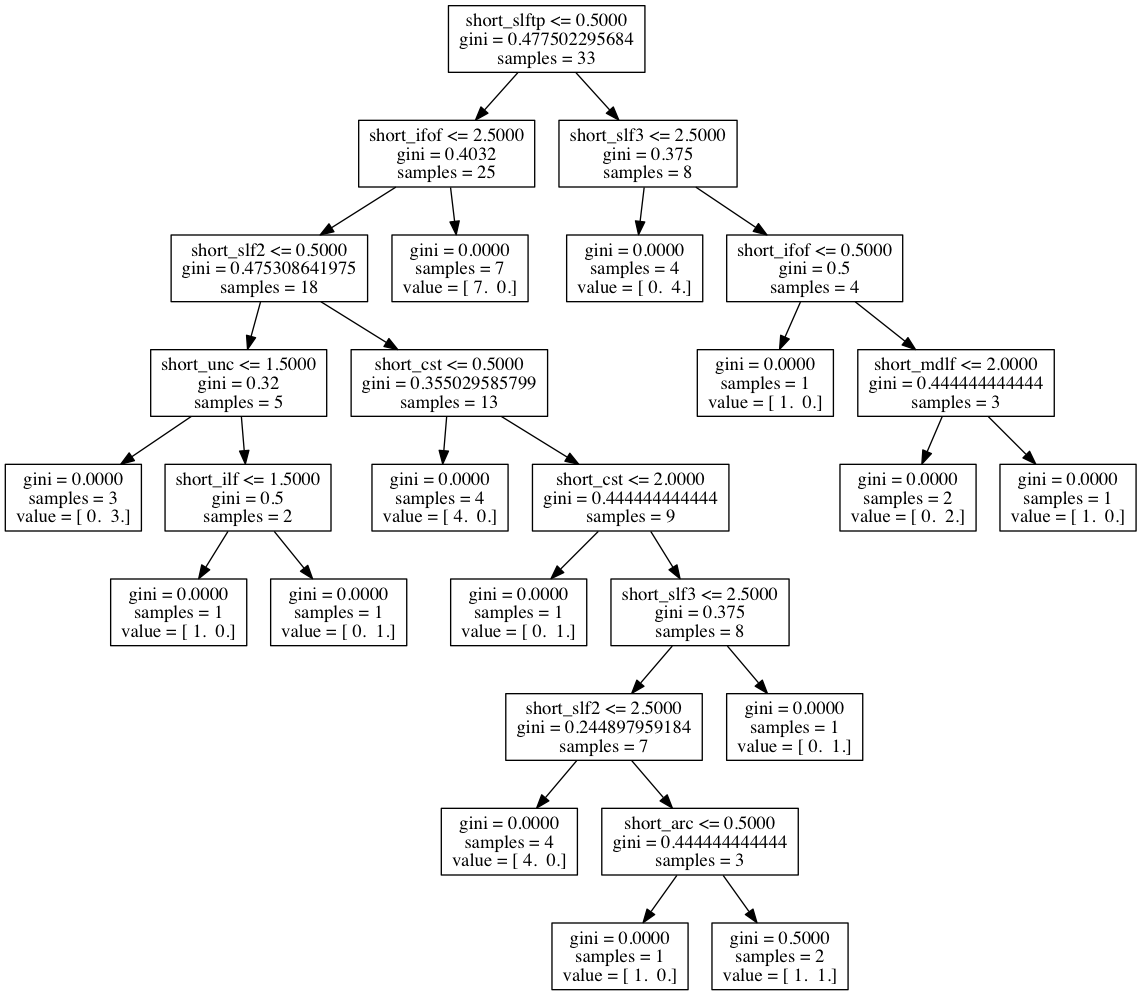

In [18]:
name = "shortLANGUAGE"
deficit = 2
print shortylabel[deficit]
dotree(shortx, shorty[:,deficit],shortfeat, name)
print "NUMBER OF DEFICITS:"
print sum(shorty[:,deficit])
Image(name+'.png',width=700,height=500)

0.479292929293
[ 0.15046346  0.11909307  0.12366941  0.13032373  0.10423106  0.08122653
  0.15990701  0.13108573]
['short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc']
1. feature 6 = short_ifof (0.159907)
2. feature 0 = short_slf2 (0.150463)
3. feature 7 = short_unc (0.131086)
4. feature 3 = short_slftp (0.130324)
5. feature 2 = short_arc (0.123669)
6. feature 1 = short_slf3 (0.119093)
7. feature 4 = short_ilf (0.104231)
8. feature 5 = short_mdlf (0.081227)


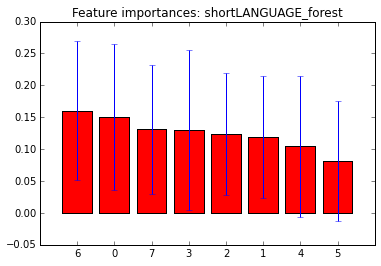

In [19]:
importances, meanaccuracy = doforest(shortx[:,:-4], shorty[:,2], shortfeat[:-4], "shortLANGUAGE_forest")

### Visual System (all tracks included in X)

#### or = optic radiation

short_vision_def
NUMBER OF DEFICITS:
4.0


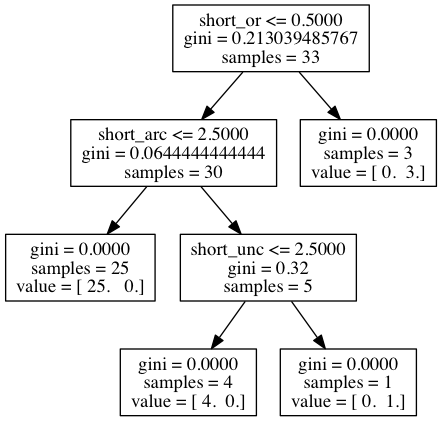

In [20]:
name = "shortOPTIC"
deficit = 3
print shortylabel[deficit]
dotree(shortx, shorty[:,deficit],shortfeat, name)
print "NUMBER OF DEFICITS:"
print sum(shorty[:,deficit])
Image(name+'.png',width=700,height=500)

0.880808080808
[ 0.03720198  0.04257556  0.09566936  0.12058282  0.07577463  0.05739816
  0.06420147  0.0813525   0.04154022  0.          0.          0.36770329]
['short_slf2', 'short_slf3', 'short_arc', 'short_slftp', 'short_ilf', 'short_mdlf', 'short_ifof', 'short_unc', 'short_cst', 'xtra', 'xtra', 'short_or']
1. feature 11 = short_or (0.367703)
2. feature 3 = short_slftp (0.120583)
3. feature 2 = short_arc (0.095669)
4. feature 7 = short_unc (0.081353)
5. feature 4 = short_ilf (0.075775)
6. feature 6 = short_ifof (0.064201)
7. feature 5 = short_mdlf (0.057398)
8. feature 1 = short_slf3 (0.042576)
9. feature 8 = short_cst (0.041540)
10. feature 0 = short_slf2 (0.037202)
11. feature 10 = xtra (0.000000)
12. feature 9 = xtra (0.000000)


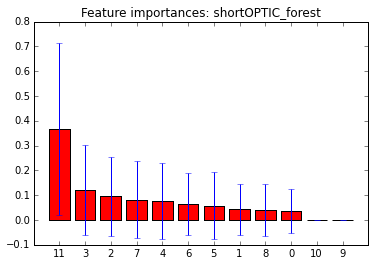

In [21]:
importances, meanaccuracy = doforest(shortx, shorty[:,3], shortfeat, "shortOPTIC_forest")

## Long Term Postsurgery (> 3 months after surgery)

### Motor System (all tracks included in X)

#### CST = Corticospinal Track

long_motor_def
NUMBER OF DEFICITS:
7.0


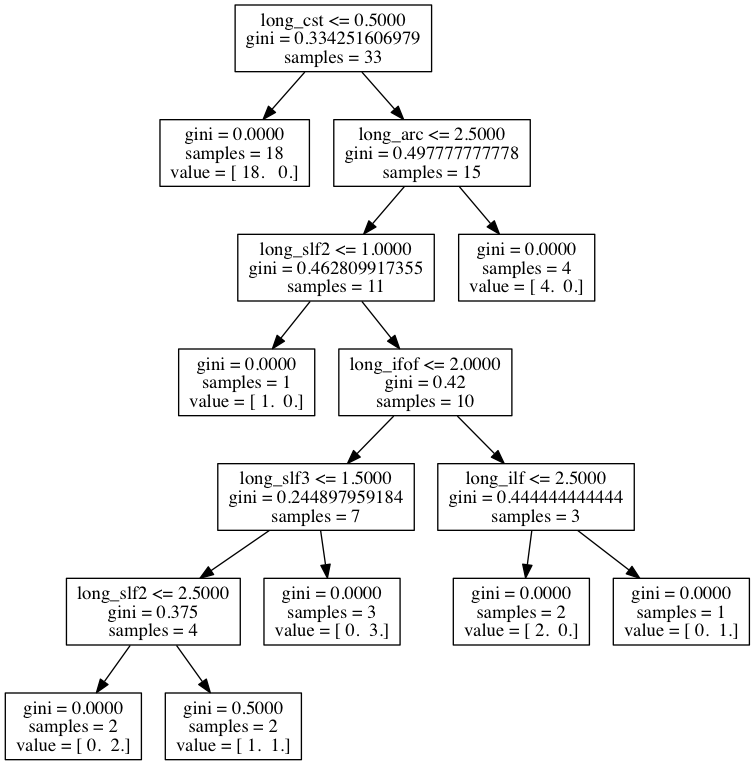

In [22]:
name = "longMOTOR"
deficit = 0
print longylabel[deficit]
dotree(longx, longy[:,deficit],longfeat, name)
print "NUMBER OF DEFICITS:"
print sum(longy[:,deficit])
Image(name+'.png',width=700,height=500)

0.756060606061
[ 0.17949043  0.10756814  0.1430677   0.07144744  0.03350843  0.04078846
  0.15088456  0.05018669  0.21501908  0.          0.          0.00803907]
['long_slf2', 'long_slf3', 'long_arc', 'long_slftp', 'long_ilf', 'long_mdlf', 'long_ifof', 'long_unc', 'long_cst', 'xtra', 'xtra', 'long_or']
1. feature 8 = long_cst (0.215019)
2. feature 0 = long_slf2 (0.179490)
3. feature 6 = long_ifof (0.150885)
4. feature 2 = long_arc (0.143068)
5. feature 1 = long_slf3 (0.107568)
6. feature 3 = long_slftp (0.071447)
7. feature 7 = long_unc (0.050187)
8. feature 5 = long_mdlf (0.040788)
9. feature 4 = long_ilf (0.033508)
10. feature 11 = long_or (0.008039)
11. feature 10 = xtra (0.000000)
12. feature 9 = xtra (0.000000)


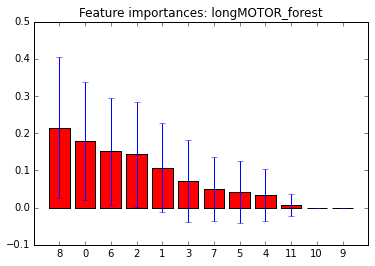

In [23]:
importances, meanaccuracy = doforest(longx, longy[:,0], longfeat, "longMOTOR_forest")

### Sensory System (Not studied well... ignore)

In [24]:
name = "longSENSE"
deficit = 1
print longylabel[deficit]
dotree(longx, longy[:,deficit],longfeat, name)
print "NUMBER OF DEFICITS:"
print sum(longy[:,deficit])
#Image(name+'.png',width=700,height=500)

long_sense_def
NUMBER OF DEFICITS:
1.0


### Language System (only language tracks included in X)

#### slftp=SLF temporal-parietal branch, arc = Arcuate, ifof=Inferior fronto-occipital, slf2 = slf branch frontal to angular gyrus, slf3 = slf branch frontal to supramarginal gyrus, mdlf = middle longitudinal

long_lang_def
NUMBER OF DEFICITS:
7.0


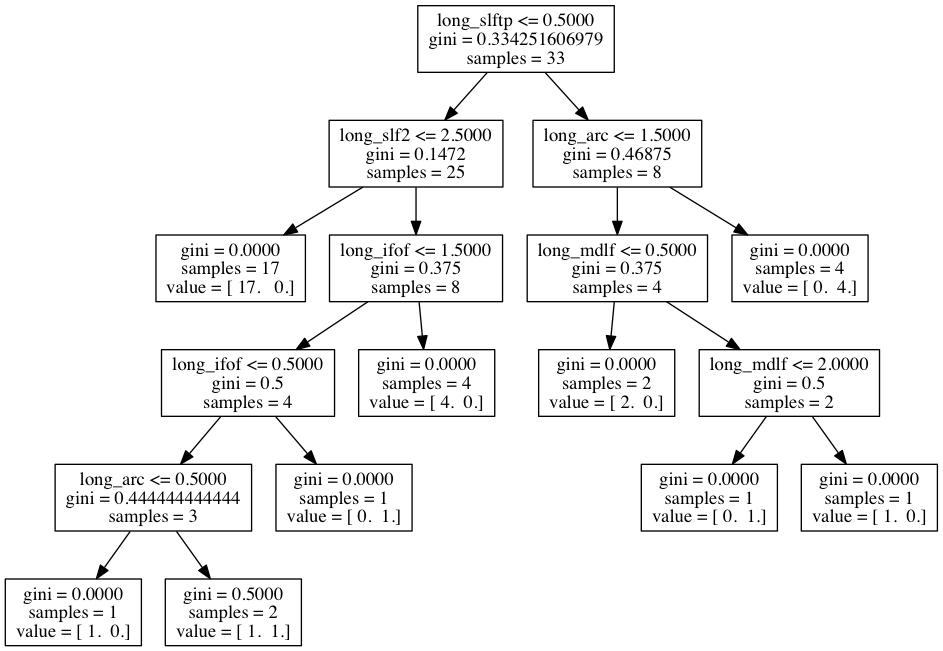

In [25]:
name = "longLANGUAGE"
deficit = 2
print longylabel[deficit]
dotree(longx, longy[:,deficit],longfeat, name)
print "NUMBER OF DEFICITS:"
print sum(longy[:,deficit])
Image(name+'.png',width=700,height=500)

0.756060606061
[ 0.13966494  0.10677741  0.14886845  0.22971484  0.05033353  0.11773849
  0.13899043  0.06791191]
['long_slf2', 'long_slf3', 'long_arc', 'long_slftp', 'long_ilf', 'long_mdlf', 'long_ifof', 'long_unc']
1. feature 3 = long_slftp (0.229715)
2. feature 2 = long_arc (0.148868)
3. feature 0 = long_slf2 (0.139665)
4. feature 6 = long_ifof (0.138990)
5. feature 5 = long_mdlf (0.117738)
6. feature 1 = long_slf3 (0.106777)
7. feature 7 = long_unc (0.067912)
8. feature 4 = long_ilf (0.050334)


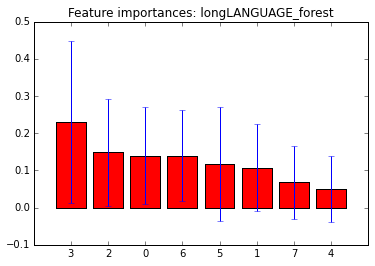

In [26]:
importances, meanaccuracy = doforest(longx[:,:-4], longy[:,2], longfeat[:-4], "longLANGUAGE_forest")

### Visual System (all tracks included in X)

#### or = optic radiation

In [27]:
name = "longOPTIC"
deficit = 3
print longylabel[deficit]
dotree(longx, longy[:,deficit],longfeat, name)
print "NUMBER OF DEFICITS:"
print sum(longy[:,deficit])
#Image(name+'.png',width=700,height=500)

long_vision_def
NUMBER OF DEFICITS:
2.0


In [28]:
#importances, meanaccuracy = doforest(longx, longy[:,3], longfeat, "longOPTIC_forest")